In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
path = '/content/braindataset.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [3]:
path = '/content/archive.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

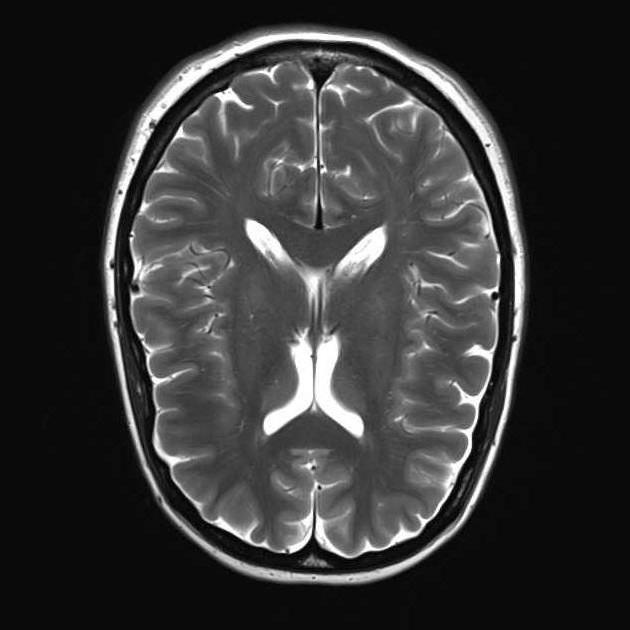

In [4]:
tf.keras.preprocessing.image.load_img("/content/braindataset/Brain_Tumor_Detection/train/no/No12.jpg")

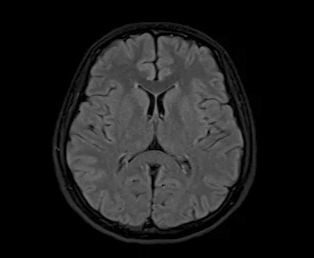

In [5]:
tf.keras.preprocessing.image.load_img("/content/braindataset/Brain_Tumor_Detection/pred/pred0.jpg")

In [6]:
gerador_treinamento = ImageDataGenerator(rescale=1./255,
                                         rotation_range=7,
                                         horizontal_flip=True,
                                         zoom_range=0.2)

In [7]:
dataset_treinamento = gerador_treinamento.flow_from_directory('/content/braindataset/Brain_Tumor_Detection/train',
                                                              target_size = (64, 64),
                                                              batch_size = 8,
                                                              class_mode = 'categorical',
                                                              shuffle = True)

Found 3000 images belonging to 2 classes.


In [8]:
dataset_treinamento.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [9]:
dataset_treinamento.class_indices

{'no': 0, 'yes': 1}

In [10]:
gerador_teste = ImageDataGenerator(rescale=1./255)
dataset_teste = gerador_teste.flow_from_directory("/content/brain_tumor_dataset",
                                                  target_size = (64,64),
                                                  batch_size = 1,
                                                  class_mode = 'categorical',
                                                  shuffle=False)

Found 253 images belonging to 2 classes.


In [11]:
network = Sequential()
network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units = 577, activation='relu'))
network.add(Dense(units = 577, activation='relu'))
network.add(Dense(units = 2, activation='softmax'))

network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [12]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
historico = network.fit(dataset_treinamento, epochs=50)

Epoch 1/50
375/375 [==============================] - 23s 33ms/step - loss: 0.5692 - accuracy: 0.7097
Epoch 2/50
375/375 [==============================] - 12s 33ms/step - loss: 0.4654 - accuracy: 0.7907
Epoch 3/50
375/375 [==============================] - 12s 33ms/step - loss: 0.4017 - accuracy: 0.8157
Epoch 4/50
375/375 [==============================] - 13s 34ms/step - loss: 0.3427 - accuracy: 0.8570
Epoch 5/50
375/375 [==============================] - 12s 33ms/step - loss: 0.2902 - accuracy: 0.8833
Epoch 6/50
375/375 [==============================] - 13s 33ms/step - loss: 0.2531 - accuracy: 0.8987
Epoch 7/50
375/375 [==============================] - 13s 34ms/step - loss: 0.2106 - accuracy: 0.9193
Epoch 8/50
375/375 [==============================] - 12s 33ms/step - loss: 0.1820 - accuracy: 0.9290
Epoch 9/50
375/375 [==============================] - 12s 33ms/step - loss: 0.1769 - accuracy: 0.9333
Epoch 10/50
375/375 [==============================] - 12s 33ms/step - loss: 0.150

In [14]:
previsoes = network.predict(dataset_teste)
previsoes

253/253 [==============================] - 1s 5ms/step


array([[9.99971867e-01, 2.80815802e-05],
       [9.99905705e-01, 9.42322004e-05],
       [9.99991298e-01, 8.69193173e-06],
       [9.99071360e-01, 9.28583846e-04],
       [9.99999762e-01, 2.95597374e-07],
       [9.99999881e-01, 1.00908196e-07],
       [9.99614060e-01, 3.85910505e-04],
       [9.99946833e-01, 5.31241967e-05],
       [9.99997854e-01, 2.19016738e-06],
       [7.52015412e-01, 2.47984573e-01],
       [1.00000000e+00, 1.61950287e-10],
       [9.99883652e-01, 1.16366551e-04],
       [9.99998808e-01, 1.19673314e-06],
       [9.99787033e-01, 2.12955769e-04],
       [1.00000000e+00, 1.01570095e-08],
       [9.90416169e-01, 9.58378240e-03],
       [1.00000000e+00, 2.00695158e-08],
       [9.99997139e-01, 2.88185811e-06],
       [9.99946833e-01, 5.31241967e-05],
       [9.99998927e-01, 1.06038453e-06],
       [9.99367177e-01, 6.32897078e-04],
       [1.00000000e+00, 2.65706390e-09],
       [9.99999642e-01, 3.70682500e-07],
       [9.97969925e-01, 2.03007599e-03],
       [9.999941

In [15]:
previsoes = np.argmax(previsoes, axis = 1)
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(dataset_teste.classes, previsoes)

0.9920948616600791

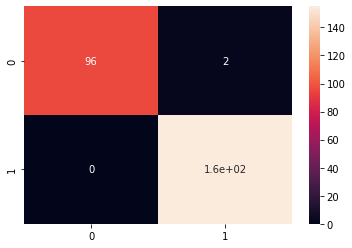

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dataset_teste.classes, previsoes)
sns.heatmap(cm, annot=True);

In [18]:
from sklearn.metrics import classification_report
print(classification_report(dataset_teste.classes, previsoes))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        98
           1       0.99      1.00      0.99       155

    accuracy                           0.99       253
   macro avg       0.99      0.99      0.99       253
weighted avg       0.99      0.99      0.99       253

